
Dataset Head: 
   Age Gender Screen Time Type Day Type  Average Screen Time (hours)  \
0    5   Male      Educational  Weekday                         0.44   
1    5   Male     Recreational  Weekday                         1.11   
2    5   Male            Total  Weekday                         1.55   
3    5   Male      Educational  Weekend                         0.50   
4    5   Male     Recreational  Weekend                         1.44   

   Sample Size  
0          500  
1          500  
2          500  
3          500  
4          500  

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 n

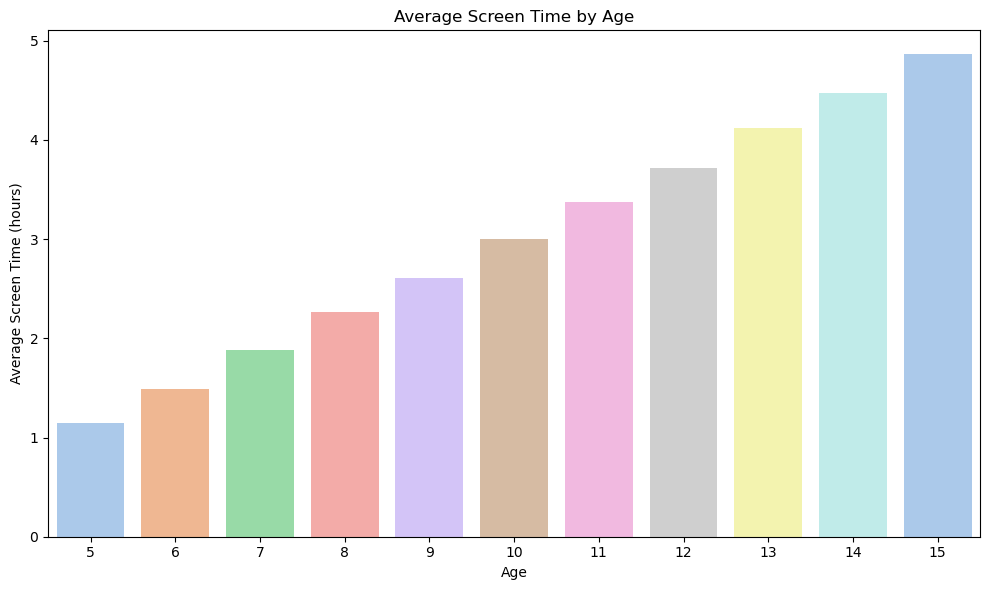

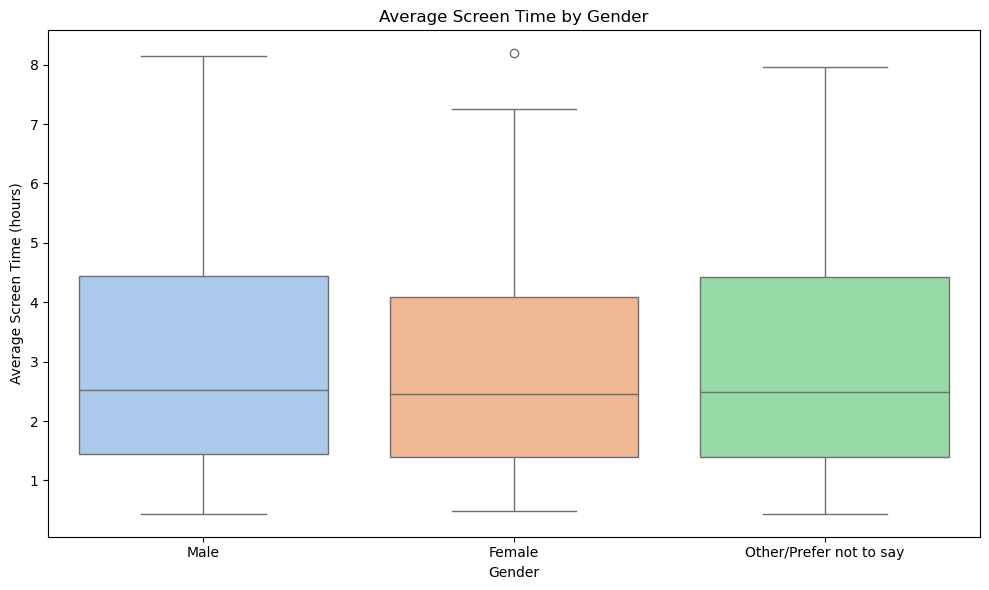

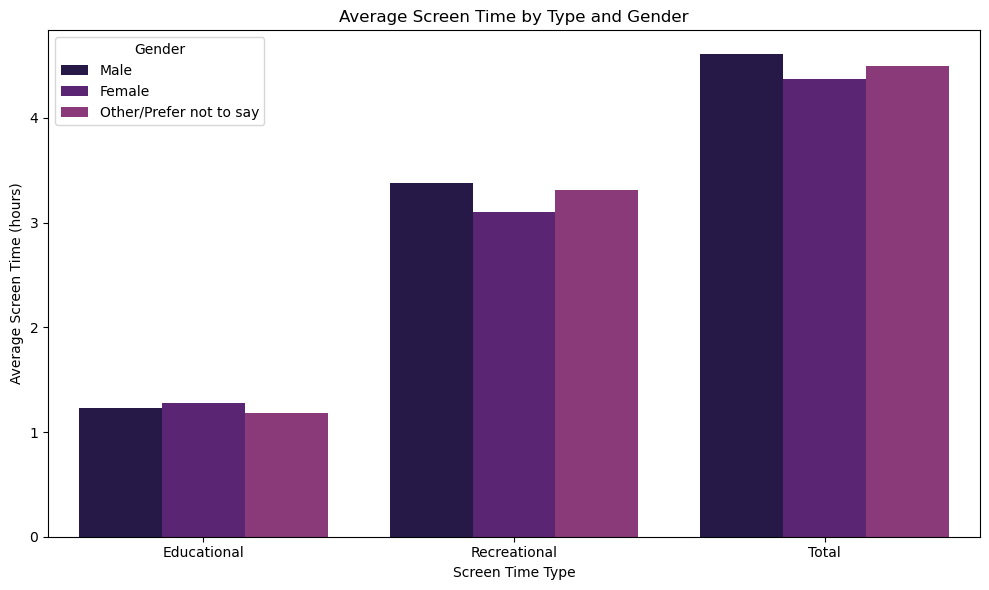

In [31]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from seaborn import colors
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

# ================================= #
# #1. Exploratory Data Analysis #
# ================================= #

# Load the dataset
s_time = pd.read_csv('screen_time.csv')

# Display the first few rows of the dataset 
# Display the first few rows of the dataset
print('\nDataset Head: ')
print(s_time.head())

# Display basic information about the dataset
print('\nDataset Info: ')
s_time.info()

print('\nDataset Describe: ')
print(s_time.describe(include = "object"))

cat_cols = []
for col in s_time.columns:
    if s_time[col].dtypes == "object":
        cat_cols.append(col)

for i in cat_cols:
    print(s_time[i].value_counts())
    print("-"*20)

print('\nDataset Shape: ')
print(s_time.shape)

# Check the columns exist in the DataFrame
print("The existing columns:", s_time.columns)

print('\nMissing Value: ')
print(s_time.isnull().sum())

# Descriptive statistics
print('\nDescriptive statistics: ')
desc_stats = s_time.describe(include='all').T
print(desc_stats)

# Data distribution
print('\nData distribution: ')
distribution_stats = s_time.select_dtypes(include=[np.number]).agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt']).T
print(distribution_stats)


# --- EDA & Plot Average Time by Age ---
plt.figure(figsize=(10, 6))
sns.barplot(data=s_time, x="Age", y="Average Screen Time (hours)", ci=None, palette=sns.color_palette("pastel"))
plt.title("Average Screen Time by Age")
plt.xlabel("Age")
plt.ylabel("Average Screen Time (hours)")
plt.tight_layout()
plt.show()

# --- EDA & Plot Average Time by Gender ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=s_time, x="Gender", y="Average Screen Time (hours)", palette=sns.color_palette("pastel"))
plt.title("Average Screen Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Screen Time (hours)")
plt.tight_layout()
plt.show()

# --- EDA & Plot Average Time by Type ---
plt.figure(figsize=(10, 6))
sns.barplot(data=s_time, x="Screen Time Type", y="Average Screen Time (hours)", hue="Gender", ci=None, palette=sns.color_palette("magma"))
plt.title("Average Screen Time by Type and Gender")
plt.xlabel("Screen Time Type")
plt.ylabel("Average Screen Time (hours)")
plt.tight_layout()
plt.show()

# Create binary target variable
# Create a binary target variable for high screen time (greater than 3 hours)
s_time["High Screen Time"] = (s_time["Average Screen Time (hours)"] > 3).astype(int)

In [11]:
# ================================= #
# 2. Data Cleaning and Preprocessing
# ================================= #

from sklearn.preprocessing import LabelEncoder

# Class balance
class_balance = s_time["High Screen Time"].value_counts()
print('\nClass_balance: ')
print(class_balance)

# Encode categorical variables
le = LabelEncoder()
s_time["Gender"] = le.fit_transform(s_time["Gender"])
s_time["Screen Time Type"] = le.fit_transform(s_time["Screen Time Type"])
s_time["Day Type"] = le.fit_transform(s_time["Day Type"])
print(s_time.head())


# Prepare training data
X = s_time.drop(columns=["Average Screen Time (hours)", "High Screen Time"])
y = s_time["High Screen Time"]



Class_balance: 
High Screen Time
0    115
1     83
Name: count, dtype: int64
   Age  Gender  Screen Time Type  Day Type  Average Screen Time (hours)  \
0    5       1                 0         0                         0.44   
1    5       1                 1         0                         1.11   
2    5       1                 2         0                         1.55   
3    5       1                 0         1                         0.50   
4    5       1                 1         1                         1.44   

   Sample Size  High Screen Time  
0          500                 0  
1          500                 0  
2          500                 0  
3          500                 0  
4          500                 0  



Model Performance:
Logistic Regression:
  Best Params: {'C': 1}
  Accuracy: 0.9500
  F1 Score: 0.9333
  Precision: 0.9333
  Recall: 0.9333
  ROC AUC: 0.9867

Gradient Boosting:
  Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
  Accuracy: 0.9250
  F1 Score: 0.8966
  Precision: 0.9286
  Recall: 0.8667
  ROC AUC: 0.9800

AdaBoost:
  Best Params: {'learning_rate': 1.0, 'n_estimators': 100}
  Accuracy: 0.9250
  F1 Score: 0.8966
  Precision: 0.9286
  Recall: 0.8667
  ROC AUC: 0.9800

Decision Tree:
  Best Params: {'criterion': 'entropy', 'max_depth': 6}
  Accuracy: 0.9250
  F1 Score: 0.8966
  Precision: 0.9286
  Recall: 0.8667
  ROC AUC: 0.9133

Model Comparison Results:


,Model,Best Params,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,Logistic Regression,{'C': 1},0.950,0.933333,0.933333,0.933333,0.986667
1,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.925,0.896552,0.928571,0.866667,0.980000
2,AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 100}",0.925,0.896552,0.928571,0.866667,0.980000
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 6}",0.925,0.896552,0.928571,0.866667,0.913333


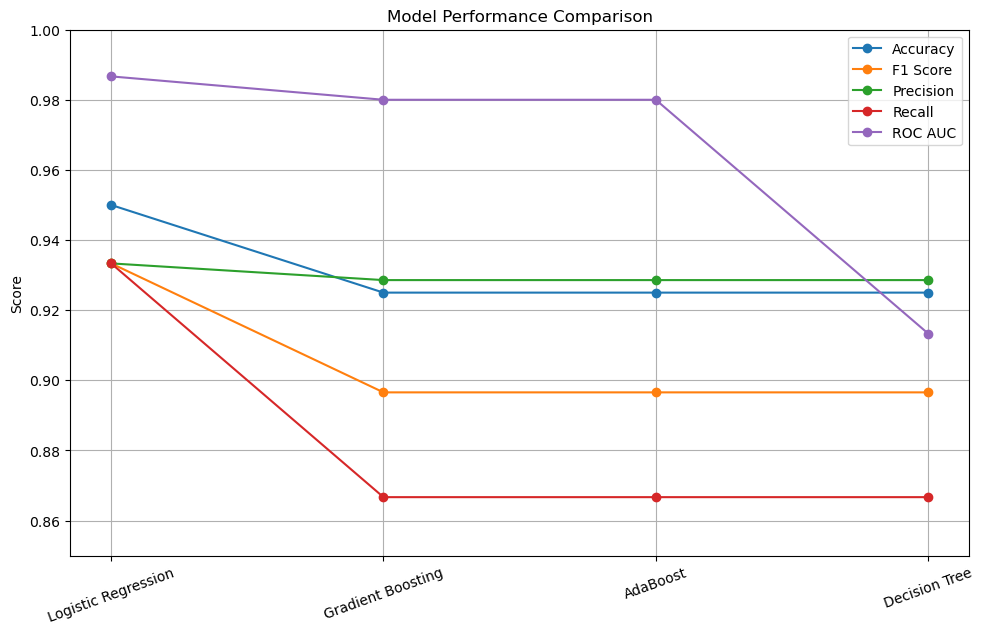

Feature Importance Table:


,Feature,Logistic Coef,Gradient Boosting,AdaBoost,Decision Tree
0,Age,1.495776,0.268391,0.199966,0.015985
1,Gender,0.136149,0.002416,0.012390,0.017684
2,Screen Time Type,3.169709,0.430410,0.481278,0.419831
3,Day Type,0.445351,0.025279,0.065994,0.074941
4,Sample Size,-1.495776,0.273504,0.240372,0.471559


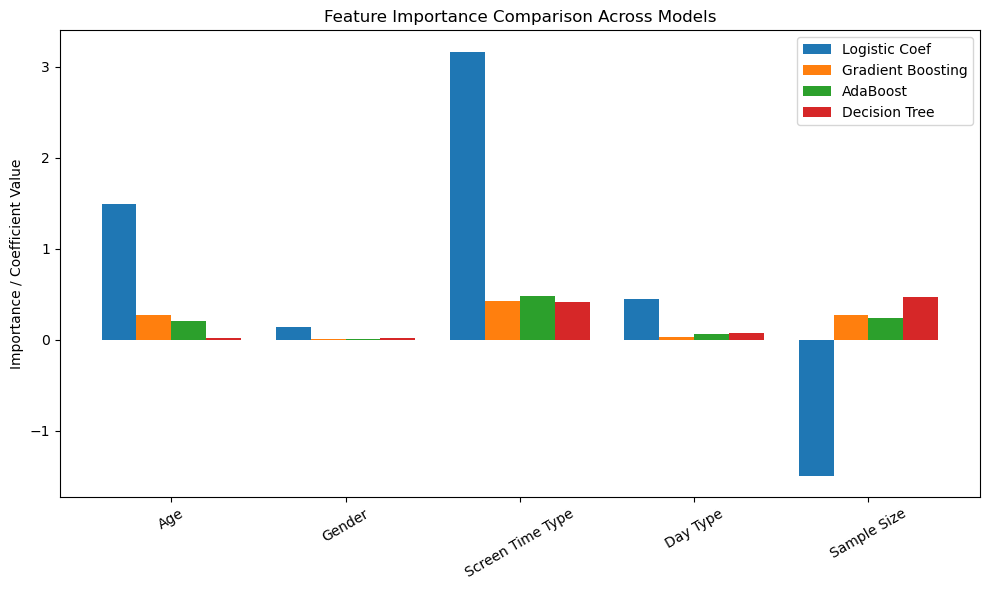

In [41]:

# ============================================ #
# #3. Experiment four machine learning models  #
# ============================================ #

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Split the data into a training 80% and a testing sets 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Model Definition & Tuning === #
# Define models and parameters
models = {
    "Logistic Regression": (LogisticRegression(), {'C': [0.01, 0.1, 1, 10]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [2, 3]
    }),
    "AdaBoost": (AdaBoostClassifier(), {
        'n_estimators': [50, 100], 'learning_rate': [0.5, 1.0]
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        'max_depth': [2, 4, 6, 8], 'criterion': ['gini', 'entropy']
    })
}

# Train, tune, and collect results
# GridSearchCV helps to find the best hyperparameter values for a model using cross-validation.
results = []
for name, (model, param_grid) in models.items():
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

    results.append({
        "Model": name,
        "Best Params": str(grid.best_params_),
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

print("\nModel Performance:")
for result in results:
    print(f"{result['Model']}:")
    print(f"  Best Params: {result['Best Params']}")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1 Score: {result['F1 Score']:.4f}")
    print(f"  Precision: {result['Precision']:.4f}")
    print(f"  Recall: {result['Recall']:.4f}")
    print(f"  ROC AUC: {result['ROC AUC']:.4f}\n")

results_df = pd.DataFrame(results)
print("Model Comparison Results:")
display(results_df)

# === Plotting Model Performance Comparison === #
plt.figure(figsize=(10, 6))
for metric in ["Accuracy", "F1 Score", "Precision", "Recall", "ROC AUC"]:
    plt.plot(results_df["Model"], results_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.85, 1.0)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=20)
plt.show()


# === Feature Importances === #
# Train models with best-known parameters
log_reg = LogisticRegression(C=1).fit(X_train_scaled, y_train)
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=100).fit(X_train_scaled, y_train)
ada = AdaBoostClassifier(learning_rate=1.0, n_estimators=100).fit(X_train_scaled, y_train)
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8).fit(X_train_scaled, y_train)

# Create feature importance DataFrame
features = X.columns.tolist()
importance_df = pd.DataFrame({
    "Feature": features,
    "Logistic Coef": log_reg.coef_[0],
    "Gradient Boosting": gb.feature_importances_,
    "AdaBoost": ada.feature_importances_,
    "Decision Tree": tree.feature_importances_
})

# Print or display results
print("Feature Importance Table:")
display(importance_df)

# Plot
bar_width = 0.2
positions = np.arange(len(features))

plt.figure(figsize=(10, 6))
plt.bar(positions - 1.5 * bar_width, importance_df["Logistic Coef"], width=bar_width, label="Logistic Coef")
plt.bar(positions - 0.5 * bar_width, importance_df["Gradient Boosting"], width=bar_width, label="Gradient Boosting")
plt.bar(positions + 0.5 * bar_width, importance_df["AdaBoost"], width=bar_width, label="AdaBoost")
plt.bar(positions + 1.5 * bar_width, importance_df["Decision Tree"], width=bar_width, label="Decision Tree")

plt.xticks(positions, features, rotation=30)
plt.ylabel("Importance / Coefficient Value")
plt.title("Feature Importance Comparison Across Models")
plt.legend()
plt.tight_layout()
plt.show()